# Nettoyage des données

In [1]:
# importer les packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle


C:\Users\Abdul Razak\AppData\Local\Temp\ipykernel_6956\3325048359.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# chargement de la base de donnée
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


pd.set_option('display.max_rows', df.shape[0]+1) pour voir toute la base de donnée
pd.set_option('display.max_rows', 10) pour afficher uniquement 10 lignes

In [3]:
# voir les valeurs maquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


on verifie pour voir s'il n'y a pas une valeur erronée

par exemple: ApplicantIncome
si on trouvait -150 en min au lieu de 150 c est qu'il y a un probleme dans la base de donnée

In [6]:
#pour montrer les variable quategorielle
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
# Renseigner les valeurs manquantes
# diviser la base de donnée en deux, une avec les variables numerique et une avec les variables quategorie
cat_data=[] #variable quategorie
num_data=[] #variable numerique
# pour renseigner les deux listes
for i,c in enumerate(df.dtypes):
    # si c = a objet, mettre toute la colonne d'ordre i
    if c=='object': 
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

# transformer notre liste en dataframe
cat_data=pd.DataFrame(cat_data)
cat_data

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Property_Area,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Semiurban,Urban,Semiurban,...,Semiurban,Urban,Semiurban,Rural,Rural,Rural,Rural,Urban,Urban,Semiurban
Loan_Status,Y,N,Y,Y,Y,Y,Y,N,Y,N,...,Y,N,Y,Y,Y,Y,Y,Y,Y,N


In [8]:
# pour inverser le tableau on utilise transpose pour faire la transposer de cette matrix
cat_data=pd.DataFrame(cat_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [9]:
# pareille pour les variable numerique
num_data=pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [10]:
# renseigner les valeurs manquantes (on fait des traitements differents pour les variables categoriques et numeriques)
# pour les variables categoriques on va remplacer les valeurs manquantes par les valeurs qui se repetent le plus
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0])) # compter les valeurs manquantes et les remplacer par les champs qui se repetent le plus
cat_data.isnull().sum().any()

False

In [11]:
# pour les varibales numeriques on va remplacer les valeurs manquantes par la valeur precedente de la meme colonne
num_data = num_data.fillna(method='bfill') # remplacer par la valeur manquante par la valeur precedente de la meme colonne
num_data.isnull().sum().any()

C:\Users\Abdul Razak\AppData\Local\Temp\ipykernel_6956\3562021193.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data = num_data.fillna(method='bfill') # remplacer par la valeur manquante par la valeur precedente de la meme colonne


False

In [12]:
# Transformer la colonne target
target_value = {'Y':1, 'N':0} # creation du dictionnaire
target = cat_data['Loan_Status']  # on récupère les données de la colonne cible
cat_data['Loan_Status'].replace(target_value, inplace=True) # On remplace les valeurs par leurs correspondants numériques dans le dictionnaire
cat_data.drop('Loan_Status', axis=1, inplace=True) # Suppression de la colonne source
target

C:\Users\Abdul Razak\AppData\Local\Temp\ipykernel_6956\1198151668.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_data['Loan_Status'].replace(target_value, inplace=True) # On remplace les valeurs par leurs correspondants numériques dans le dictionnaire


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

- Conversion des données en numérique

for i in range(len(target)):
    if target[i] not in list(target_value.keys()):
        print("The value ", target[i], " is missing in the dictionary.")
    else:
        target[i] = target_value[target[i]]

print(target[:5])

"""
On peut également utiliser le code ci-dessous pour convertir toutes les valeurs manquantes en une seule valeur par défaut (ici 0).
On peut également utiliser un moyen plus élaboré pour convertir ces valeurs :
on crée une fonction qui va remplacer toutes les valeurs manquantes par la moyenne de celles-ci.
La fonction est la suivante :
"""


In [13]:
# remplacer les variables categorie par des 0 et des 1 avec sklearn automatiquement
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i]) #on utilise la methode fit_transform de LabelEncoder pour transformer nos données en valeur numerique 0, 1, 2...
    
cat_data



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [14]:
# supprimer Loan_ID
cat_data.drop(["Loan_ID"], axis=1, inplace=True)

In [15]:
# Concatener cat_data et num_data et specifier la colonne target
X = pd.concat([cat_data,num_data],axis=1)
y = target

In [16]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [17]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [18]:
# # Liste des variables explicatives dans votre dataframe
# variables_explicatives = ;['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth','MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race','Diabetic', 'PhysicalActivity', 'GenHealth','SleepTime', 'Asthma', 'KidneyDisease','SkinCancer']

# # Variable cible
# variable_cible = "HeartDisease"

# # Liste pour stocker les résultats
# resultats = []

# # Meilleur score
# meilleur_score = -np.inf

# # Générer toutes les combinaisons de toutes les variables explicatives sauf une à la fois
# for variable_a_exclure in variables_explicatives:
#     variables_a_inclure = [var for var in variables_explicatives if var != variable_a_exclure]

#     # Sélectionner les colonnes nécessaires dans le dataframe
#     variables_entree = df[variables_a_inclure]

#     # Séparer les données en ensembles d'entraînement et de test
#     x_train, x_test, y_train, y_test = train_test_split(variables_entree, df[variable_cible], test_size=0.2, random_state=1)

#     # Créer et entraîner le modèle de régression logistique
#     model_logistique = LogisticRegression(random_state=1)
#     model_logistique.fit(x_train, y_train)

#     # Prédire les valeurs sur l'ensemble de test
#     y_pred_logistique = model_logistique.predict(x_test)

#     # Mesurer la précision du modèle de régression logistique
#     precision_logistique = accuracy_score(y_test, y_pred_logistique)

#     # Convertir la précision en pourcentage
#     precision_logistique_pourcent = precision_logistique * 100

#     # Créer et entraîner le modèle d'arbre de décision
#     model_decision = DecisionTreeClassifier(random_state=1)
#     model_decision.fit(x_train, y_train)

#     # Prédire les valeurs sur l'ensemble de test
#     y_pred_decision = model_decision.predict(x_test)

#     # Mesurer la précision du modèle d'arbre de décision
#     precision_decision = accuracy_score(y_test, y_pred_decision)

#     # Convertir la précision en pourcentage
#     precision_decision_pourcent = precision_decision * 100

#     # Stocker les résultats
#     resultats.append({
#         'Variables_explicatives': variables_a_inclure,
#         'Précision_régression_logistique': precision_logistique_pourcent,
#         'Précision_arbre_de_décision': precision_decision_pourcent
#     })

#     # Mise à jour du meilleur score
    
#     if precision_logistique_pourcent > meilleur_score or precision_decision_pourcent > meilleur_score:
#         meilleur_score = max(precision_logistique_pourcent, precision_decision_pourcent)
#         meilleure_variable = variables_a_inclure

# # Afficher les résultats
# for resultat in resultats:
#     print(f"Variables explicatives : {resultat['Variables_explicatives']}")
#     print(f"Précision régression logistique : {resultat['Précision_régression_logistique']}")
#     print(f"Précision arbre de décision : {resultat['Précision_arbre_de_décision']}")

# # Affichage du meilleur score
# print(f"Meilleur score : {meilleur_score}")


# Analyse exploratoire

In [19]:
# voir combien de credit son accepté et combien sont supprimés
# va commencer par la variable target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

422 credits accepté
192 credits refusé

le pourcentage des crédits accordés est: 0.3127035830618892
le pourcentage des crédits non accordés est: 0.6872964169381107


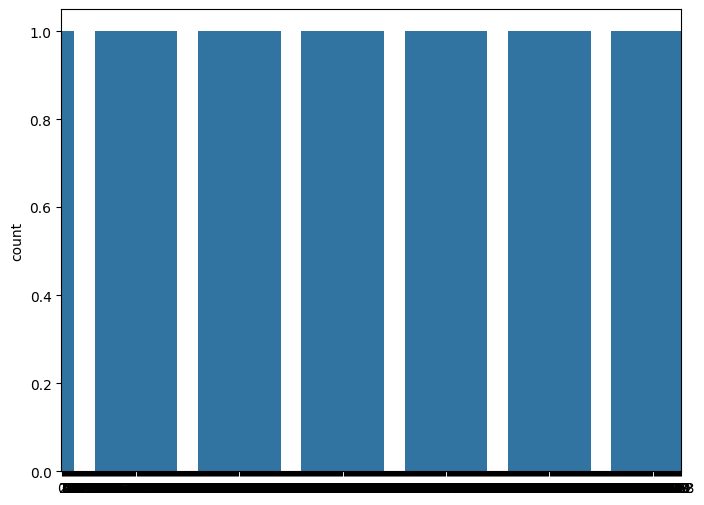

In [20]:
#visualisation variable cible variable categorie
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0] / len(target)
no = target.value_counts()[1] / len(target)
print(f'le pourcentage des crédits accordés est: {yes}')
print(f'le pourcentage des crédits non accordés est: {no}')

plt.show()  # Pour afficher le graphique

C:\Users\Abdul Razak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


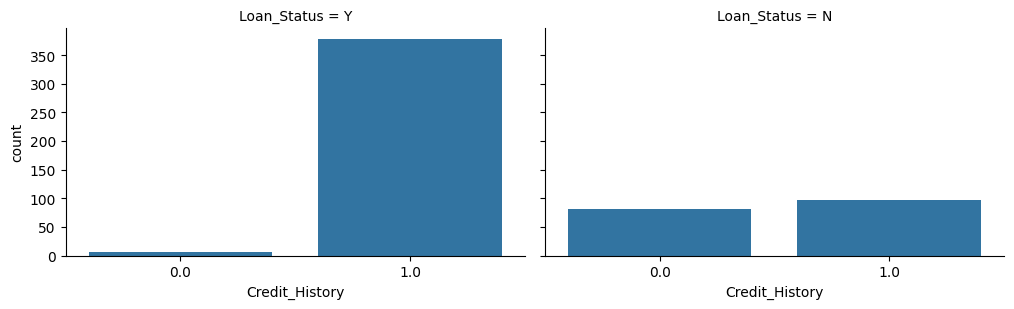

In [21]:
# examiner l'historique des credits
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


figure gauche: credit accepté, la majorité des gens qui ont deja un historique de credit
figure droite: credit refusé il y a un equilibre entre ceux qui ont un historique et ceux qui n'en ont pas

### conclusion: si tu as un historique de credit, il y a de forte chance que ton credit soit accordé.

C:\Users\Abdul Razak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


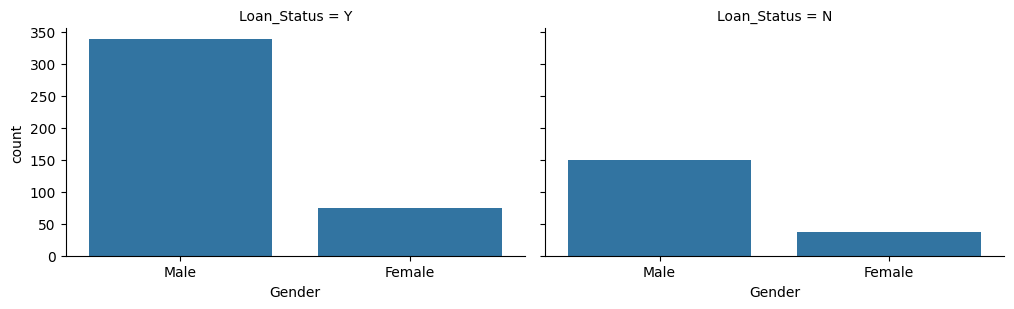

In [22]:
# sexe (le meme code pour gender)
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')


On remarque que c'est les homme qui demande plus de credit donc c'est eux qui ont le plus de credit accepté
#### homme = 1 et femme = 0

C:\Users\Abdul Razak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


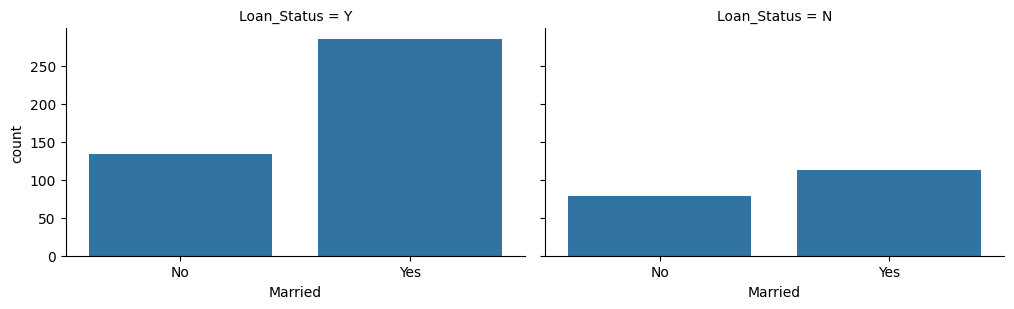

In [23]:
# Married
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

on voit que les gens mariés sont succeptible de voir leur credit accepté
et des les credits refusés il n'y a pas de grandes differences

C:\Users\Abdul Razak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


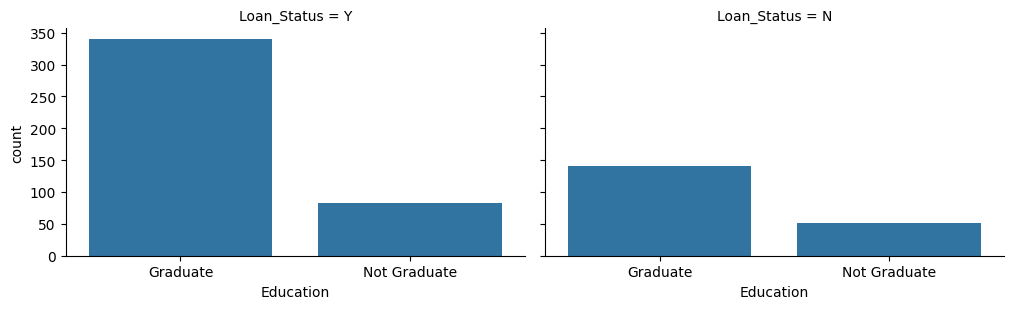

In [24]:
# Education
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

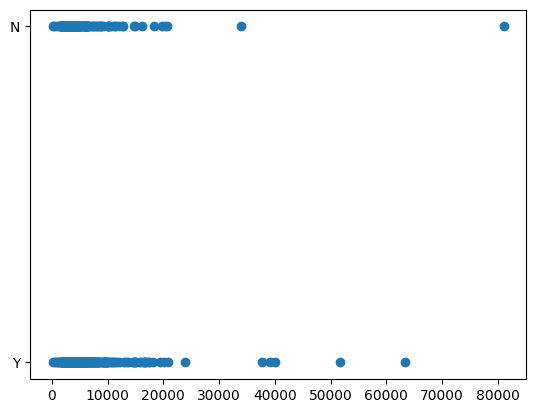

In [25]:
# variable numerique (nuage de point)
# revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

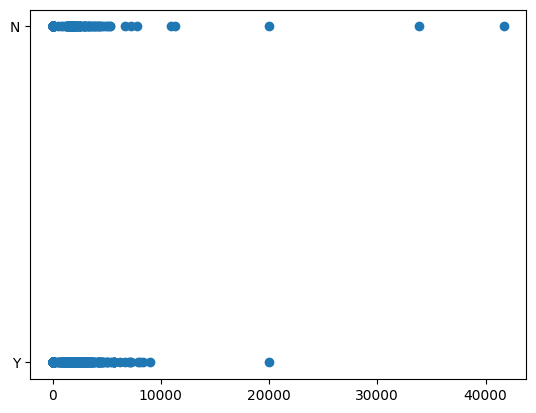

In [26]:
# l'impact du revenu du conjoint
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

pas d'impact encore

In [27]:
# la base de données pour notre analyse exploratoire
df = pd.concat([cat_data,num_data,target],axis=1)

In [28]:
# relation entre les variables independantes et notre variable cible
df.groupby('Loan_Status').median() # ce code ne passe que lorsque tout est encodé
# resultat nous montre que la variable est tout aussi importante

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


# Realisation du modèle

In [29]:
# Diviser la base de données en une base de données test et d'entrainement (stratifiedshfflesplit)
# avec Stratifiedshufflesplit on fait la division de maniere intelligente, les paremetre prennent un peu de tout de la partie d'entrainement avec les memeq proportion en essayant d'avoir des profiles diversifiés
sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42) # nombre de split, taille de la partie test, figer le resultat

#boucle for pour la division
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test] 
    y_train, y_test = y.iloc[train], y.iloc[test]
    
# print('Nombre d\'observations dans le jeu de test :', len(y_test))
# # Afficher les 5 premières lignes du jeu de test
# print(X_test.head())
print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [30]:
# # On applique les trois modeles et on choisit le meilleur
# # Définir les variables explicatives et la variable cible
# variables_explicatives = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
# variable_cible = "Loan_Status"

# # Liste pour stocker les résultats
# resultats = []

# # Meilleur score
# meilleur_score = -np.inf

# # Meilleure combinaison de variables
# meilleure_combinaison = None

# # Définir le nombre d'itérations pour la validation croisée
# n_splits = 5

# # Créer un objet StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=1)

# # Itérer sur les différentes combinaisons de variables
# for train_index, test_index in sss.split(df[variables_explicatives], df[variable_cible]):
    
#     # Séparer les données en ensembles d'entraînement et de test
#     x_train, x_test = df.loc[train_index, variables_explicatives], df.loc[test_index, variables_explicatives]
#     y_train, y_test = df.loc[train_index, variable_cible], df.loc[test_index, variable_cible]

#     # Itérer sur toutes les variables explicatives
#     for variable_a_exclure in variables_explicatives:
#         variables_a_inclure = [var for var in variables_explicatives if var != variable_a_exclure]

#         # Créer et entraîner le modèle de régression logistique
#         model_logistique = LogisticRegression(random_state=1)
#         model_logistique.fit(x_train[variables_a_inclure], y_train)

#         # Prédire les valeurs sur l'ensemble de test
#         y_pred_logistique = model_logistique.predict(x_test[variables_a_inclure])

#         # Mesurer la précision du modèle de régression logistique
#         precision_logistique = accuracy_score(y_test, y_pred_logistique)

#         # Convertir la précision en pourcentage
#         precision_logistique_pourcent = precision_logistique * 100

#         # Créer et entraîner le modèle d'arbre de décision
#         model_decision = DecisionTreeClassifier(random_state=1)
#         model_decision.fit(x_train[variables_a_inclure], y_train)

#         # Prédire les valeurs sur l'ensemble de test
#         y_pred_decision = model_decision.predict(x_test[variables_a_inclure])

#         # Mesurer la précision du modèle d'arbre de décision
#         precision_decision = accuracy_score(y_test, y_pred_decision)

#         # Convertir la précision en pourcentage
#         precision_decision_pourcent = precision_decision * 100

#         # Stocker les résultats
#         resultats.append({
#             'Variables_explicatives': variables_a_inclure,
#             'Précision_régression_logistique': precision_logistique_pourcent,
#             'Précision_arbre_de_décision': precision_decision_pourcent
#         })

#         # Mise à jour du meilleur score et de la meilleure combinaison
#         if precision_logistique_pourcent > meilleur_score or precision_decision_pourcent > meilleur_score:
#             meilleur_score = max(precision_logistique_pourcent, precision_decision_pourcent)
#             meilleure_combinaison = variables_a_inclure

# # Afficher les résultats
# for resultat in resultats:
#     print(f"Variables explicatives : {resultat['Variables_explicatives']}")
#     print(f"Précision régression logistique : {resultat['Précision_régression_logistique']}")
#     print(f"Précision arbre de décision : {resultat['Précision_arbre_de_décision']}")

# # Affichage du meilleur score et de la meilleure combinaison
# print(f"Meilleur score : {meilleur_score}")
# print(f"Meilleure combinaison de variables : {meilleure_combinaison}")


In [31]:
# On applique les trois modeles et on choisit le meilleur(vu que nous sommes dans un probleme de classification donc on utilisera les trois algorithmes)
# Importation des modèles
models = {
    "Logistic Regression": LogisticRegression(random_state=42),  # Régression logistique
    "k-Nearest Neighbors": KNeighborsClassifier(),  # K plus proches voisins
    "Decision Tree": DecisionTreeClassifier(max_depth=1, random_state=42)  # Arbre de décision
}

# Fonction pour calculer la précision du modèle
def score(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f"La précision du modèle est: {acc}")

# Fonction pour entraîner, tester et évaluer les modèles
def train_test_eval(models, X_train, y_train, X_test, y_test):
    # Pour chaque modèle dans le dictionnaire 'models'
    for name, model in models.items():
        print(name,':')  # Affichage du nom du modèle
        model.fit(X_train, y_train)  # Entraînement du modèle sur les données d'entraînement
        y_pred = model.predict(X_test)  # Prédiction sur les données de test
        score(y_test, y_pred)  # Calcul et affichage de la précision du modèle
        print('-'*30)  # Affichage d'une ligne de séparation après chaque modèle

# Appel de la fonction pour entraîner, tester et évaluer les modèles
train_test_eval(models, X_train, y_train, X_test, y_test)

   

Logistic Regression :
La précision du modèle est: 0.8536585365853658
------------------------------
k-Nearest Neighbors :
La précision du modèle est: 0.6504065040650406
------------------------------
Decision Tree :
La précision du modèle est: 0.8455284552845529
------------------------------


C:\Users\Abdul Razak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Definir de une nouvelle base de donnée avec des variables plus explicatives
# X_2 = X[['Gender','Married','CoapplicantIncome','ApplicantIncome','Credit_History']]
X_2 = X[['Married','CoapplicantIncome','Credit_History']]

In [33]:
# Diviser la base de données en une base de données test et d'entrainement (stratifiedshfflesplit)
sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42) # nombre de split, taille de la partie test, figer le resultat

#boucle for pour la division
for train, test in sss.split(X_2,y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test] 
    y_train, y_test = y.iloc[train], y.iloc[test]
    
# print('Nombre d\'observations dans le jeu de test :', len(y_test))
# # Afficher les 5 premières lignes du jeu de test
# print(X_test.head())
print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [34]:
train_test_eval(models, X_train, y_train, X_test, y_test)

Logistic Regression :
La précision du modèle est: 0.8536585365853658
------------------------------
k-Nearest Neighbors :
La précision du modèle est: 0.6991869918699187
------------------------------
Decision Tree :
La précision du modèle est: 0.8455284552845529
------------------------------


# Deploiement du modèle

In [35]:
# Appliquer la regression logistique sur notre base de donnée
Classifier = LogisticRegression()
Classifier.fit(X_2, y)

LogisticRegression()

In [36]:
# Enregistrer le modèle pour le deploiement
pickle.dump(Classifier, open("classifier_model.pkl", "wb"))